# Import libraries & dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv("bill_authentication.csv")

# EDA

In [7]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


No missing data observed in dataset

In [8]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [9]:
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

# Train test split

Split the data into train and test with 70% train & 30% test samples

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=df.drop("Class",axis=1)

In [12]:
y=df["Class"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)

# Build pre model

Decision tree classifier with max tree depth of 5 is considered default

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Plot decision tree for pre model

In [34]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Lohith/Anaconda3/Library/bin/graphviz'

In [35]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df.columns[1:])
features

['Skewness', 'Curtosis', 'Entropy', 'Class']

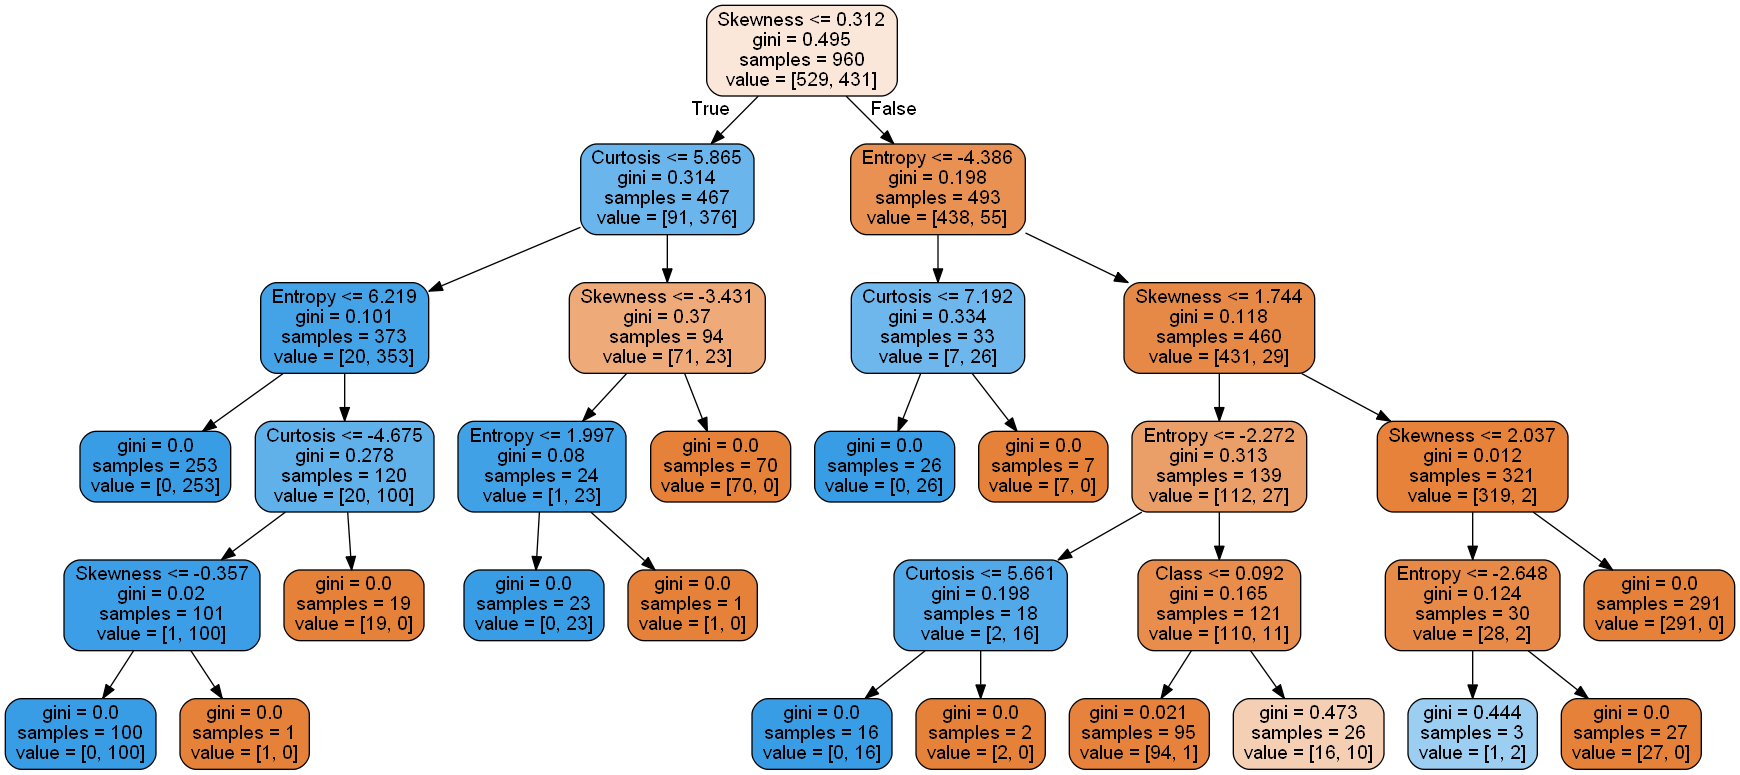

In [36]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Tree hyper parameters needs to be tuned using gridsearch cv
Classification model performance metrics calculation

# Decision tree classification performance metrics

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
y_pred_default = dt_default.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       233
          1       0.99      0.95      0.97       179

avg / total       0.97      0.97      0.97       412



In [19]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[231   2]
 [  9 170]]
0.973300970874


Accuracy of the model is good at 0.97 with lesser type 1 errors.
Further we can check the model improvement by tuning hyper parameters using gridsearchcv method

# Gridsearch CV

In [20]:
from sklearn.model_selection import GridSearchCV

Hyperparameters such as max_depth which decides depth of the tree,min_samples_leaf:minimum samples required at leaf node during spit,max_features: max features to be considered during split are considered for tuning.

In [21]:
param_grid = {
    'max_depth': range(1, 4, 1),
    'min_samples_leaf': range(1, 4, 1),
    "max_features":[2,3,4]
}
n_folds = 5

dtree decision tree classifier model is built 

In [22]:
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

In [23]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 4), 'min_samples_leaf': range(1, 4), 'max_features': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [24]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.954166666667
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


Above estimators indicate there are best estimators to be considered to build model
Here Gini index is preferred
Gini index will help to decide root node by monitoring homogeneity.
Decision tree classifier is built with gini as performance metric

# Build post model

In [25]:

clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=2,
                                  min_samples_split=2)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

# Plot decision tree for post model

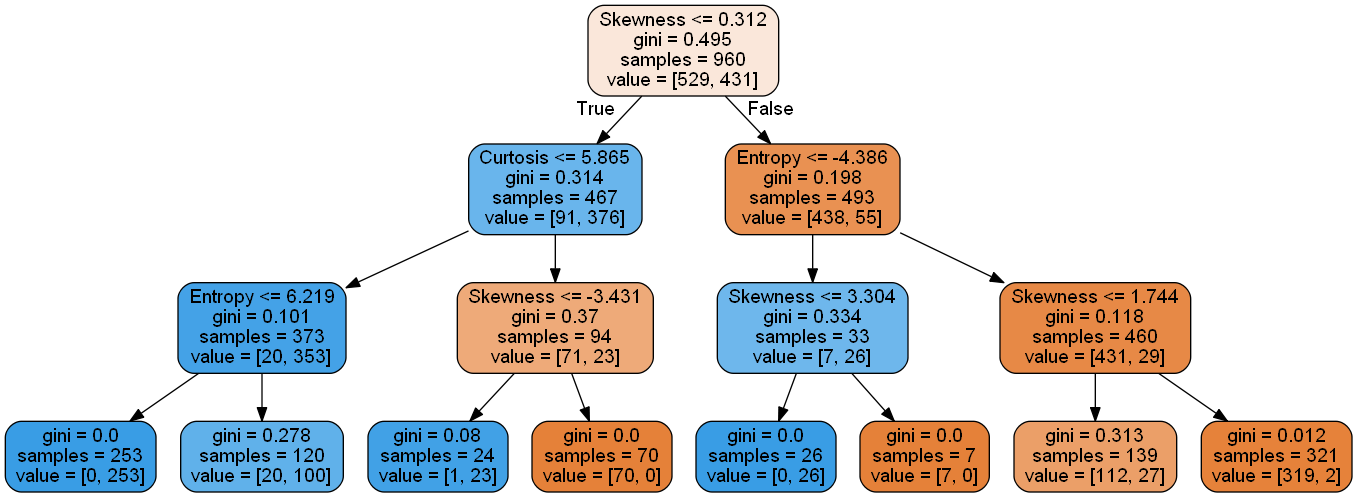

In [37]:
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [26]:
clf_gini.score(X_test,y_test)

0.94174757281553401

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95       233
          1       0.96      0.91      0.93       179

avg / total       0.94      0.94      0.94       412



In [28]:
print(confusion_matrix(y_test,y_pred))

[[226   7]
 [ 17 162]]


In [29]:
print(accuracy_score(y_test,y_pred))

0.941747572816


# Inference

Accuracy of dependent Class variable has decreased from 0.97 to 0.94 post hyper parameter tuning.Pre model can be considered over post model.
False positive has increased from 2 to 7
False negatives have also increased from 9 to 17
Pre model is better than post model as AUC is better in pre model

In [39]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix, auc, f1_score
from sklearn.metrics import precision_score, recall_score, roc_curve

In [45]:
base_dtree_probs = dt_default.predict_proba(X_test)[:,1]
final_dtree_probs =clf_gini.predict_proba(X_test)[:,1]

bdtree_fpr, bdtree_tpr, bdtree_thresh = roc_curve(y_test, base_dtree_probs)
fdtree_fpr, fdtree_tpr, fdtree_thresh =  roc_curve(y_test, final_dtree_probs)

Pre_model_roc_auc = auc(bdtree_fpr, bdtree_tpr)
Post_model_roc_auc = auc(fdtree_fpr, fdtree_tpr)

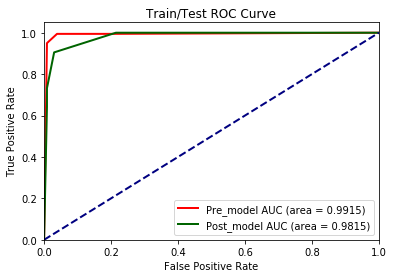

In [47]:

plt.figure()
plt.plot(bdtree_fpr, bdtree_tpr, color='red',
         lw=2, label='Pre_model AUC (area = %0.4f)' % Pre_model_roc_auc)
plt.plot(fdtree_fpr, fdtree_tpr, color='darkgreen',
         lw=2, label='Post_model AUC (area = %0.4f)' % Post_model_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train/Test ROC Curve')
plt.legend(loc="lower right")
plt.show()